#                                          # Titanic survived Project

In [82]:
import pandas as pd

In [83]:
import numpy as np

In [84]:
import seaborn as sns

In [85]:
import matplotlib.pyplot as plt

In [86]:
import warnings

In [87]:
warnings.filterwarnings('ignore')

In [88]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler

In [89]:
df=pd.read_csv("Titanic survived project.csv")# load the data set

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df.head()# top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.tail()#last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [93]:
df.sample()#random selected row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


In [94]:
df.shape#no. of rows/col.

(891, 12)

In [95]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
# Print the list of columns (features) in the dataset
print("Columns:", df.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [97]:
df.info()#information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
df.describe()#statiscal information

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
df.isnull()# check if any null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
df.isnull().sum() #sum of null rows

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

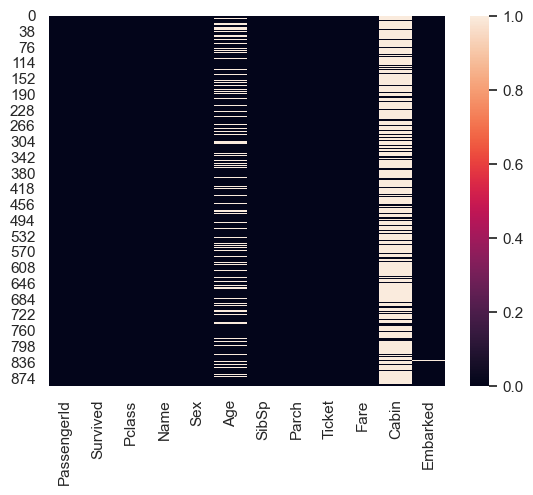

In [101]:
sns.heatmap(df.isnull())

In [102]:
# Replace null values in numeric columns with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [103]:
# Replace null values in categorical columns with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [104]:
# Drop columns with too many missing values or those that don't contribute much
df.drop(['Cabin'], axis=1, inplace=True)

In [105]:
# Check if null values are handled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [106]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [107]:
#value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

In [108]:
# Calculate counts and unique values for each column
column_info = pd.DataFrame({'Column': df.columns,
                            'Count': df.count(),
                            'Unique Values': df.nunique()})

In [109]:
print(column_info)

                  Column  Count  Unique Values
PassengerId  PassengerId    891            891
Survived        Survived    891              2
Pclass            Pclass    891              3
Name                Name    891            891
Sex                  Sex    891              2
Age                  Age    891             89
SibSp              SibSp    891              7
Parch              Parch    891              7
Ticket            Ticket    891            681
Fare                Fare    891            248
Embarked        Embarked    891              3


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [111]:
# Set up the style for plots
sns.set(style="whitegrid")

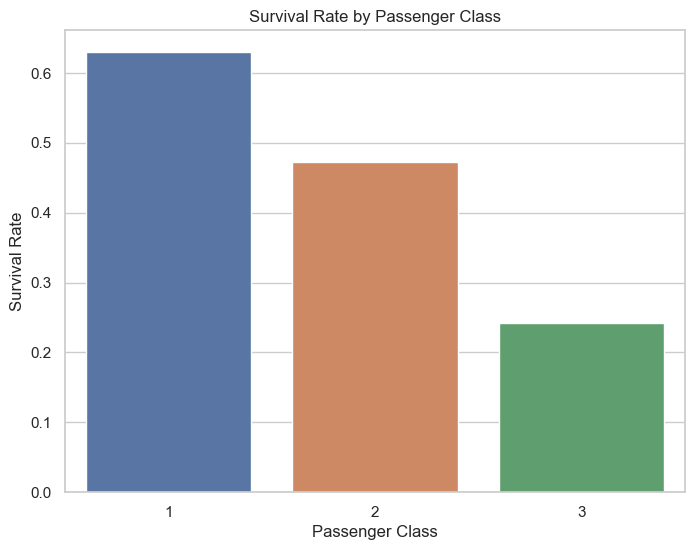

In [112]:
# Explore the relationship between Pclass and Survived using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

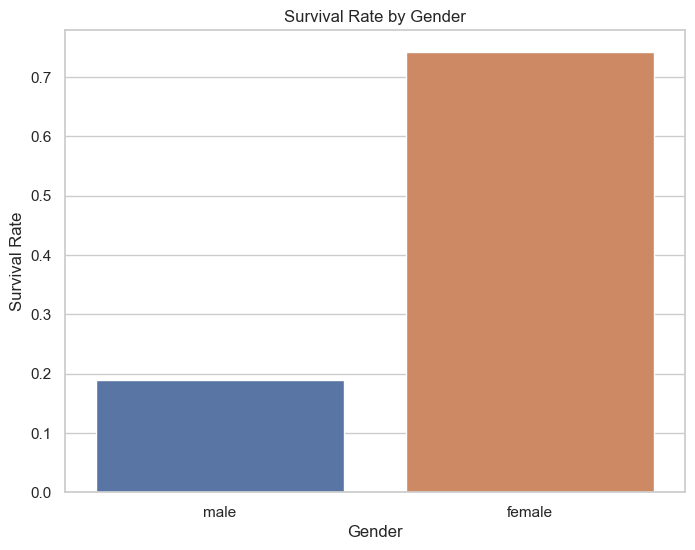

In [113]:
# Explore the relationship between Sex and Survived using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

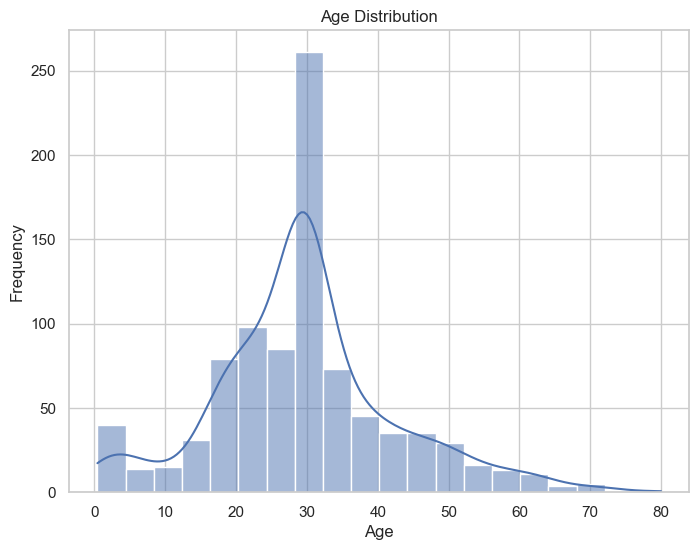

In [114]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

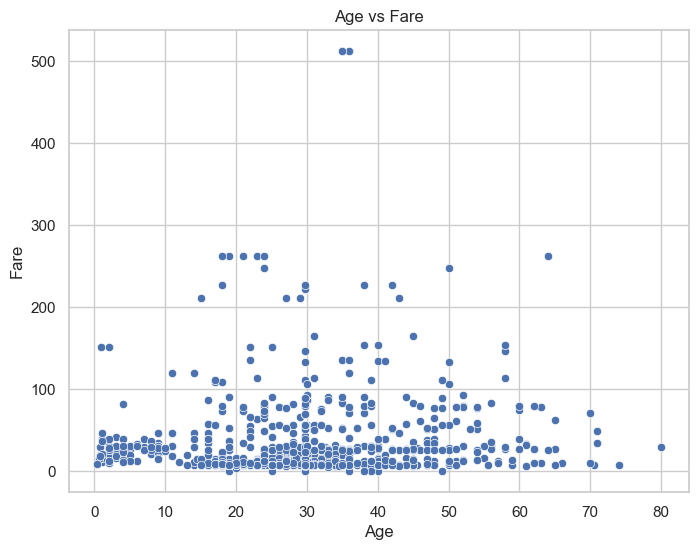

In [115]:
# Explore the relationship between Age and Fare using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

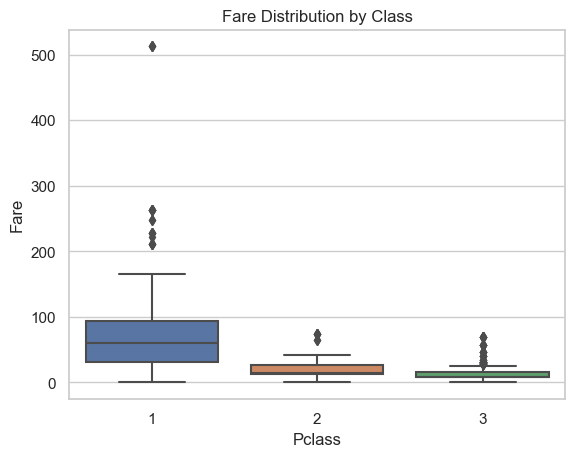

In [116]:
# Box plot of fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()

In [117]:
# Check for outliers using box plots
numeric_columns = df.select_dtypes(include=np.number).columns

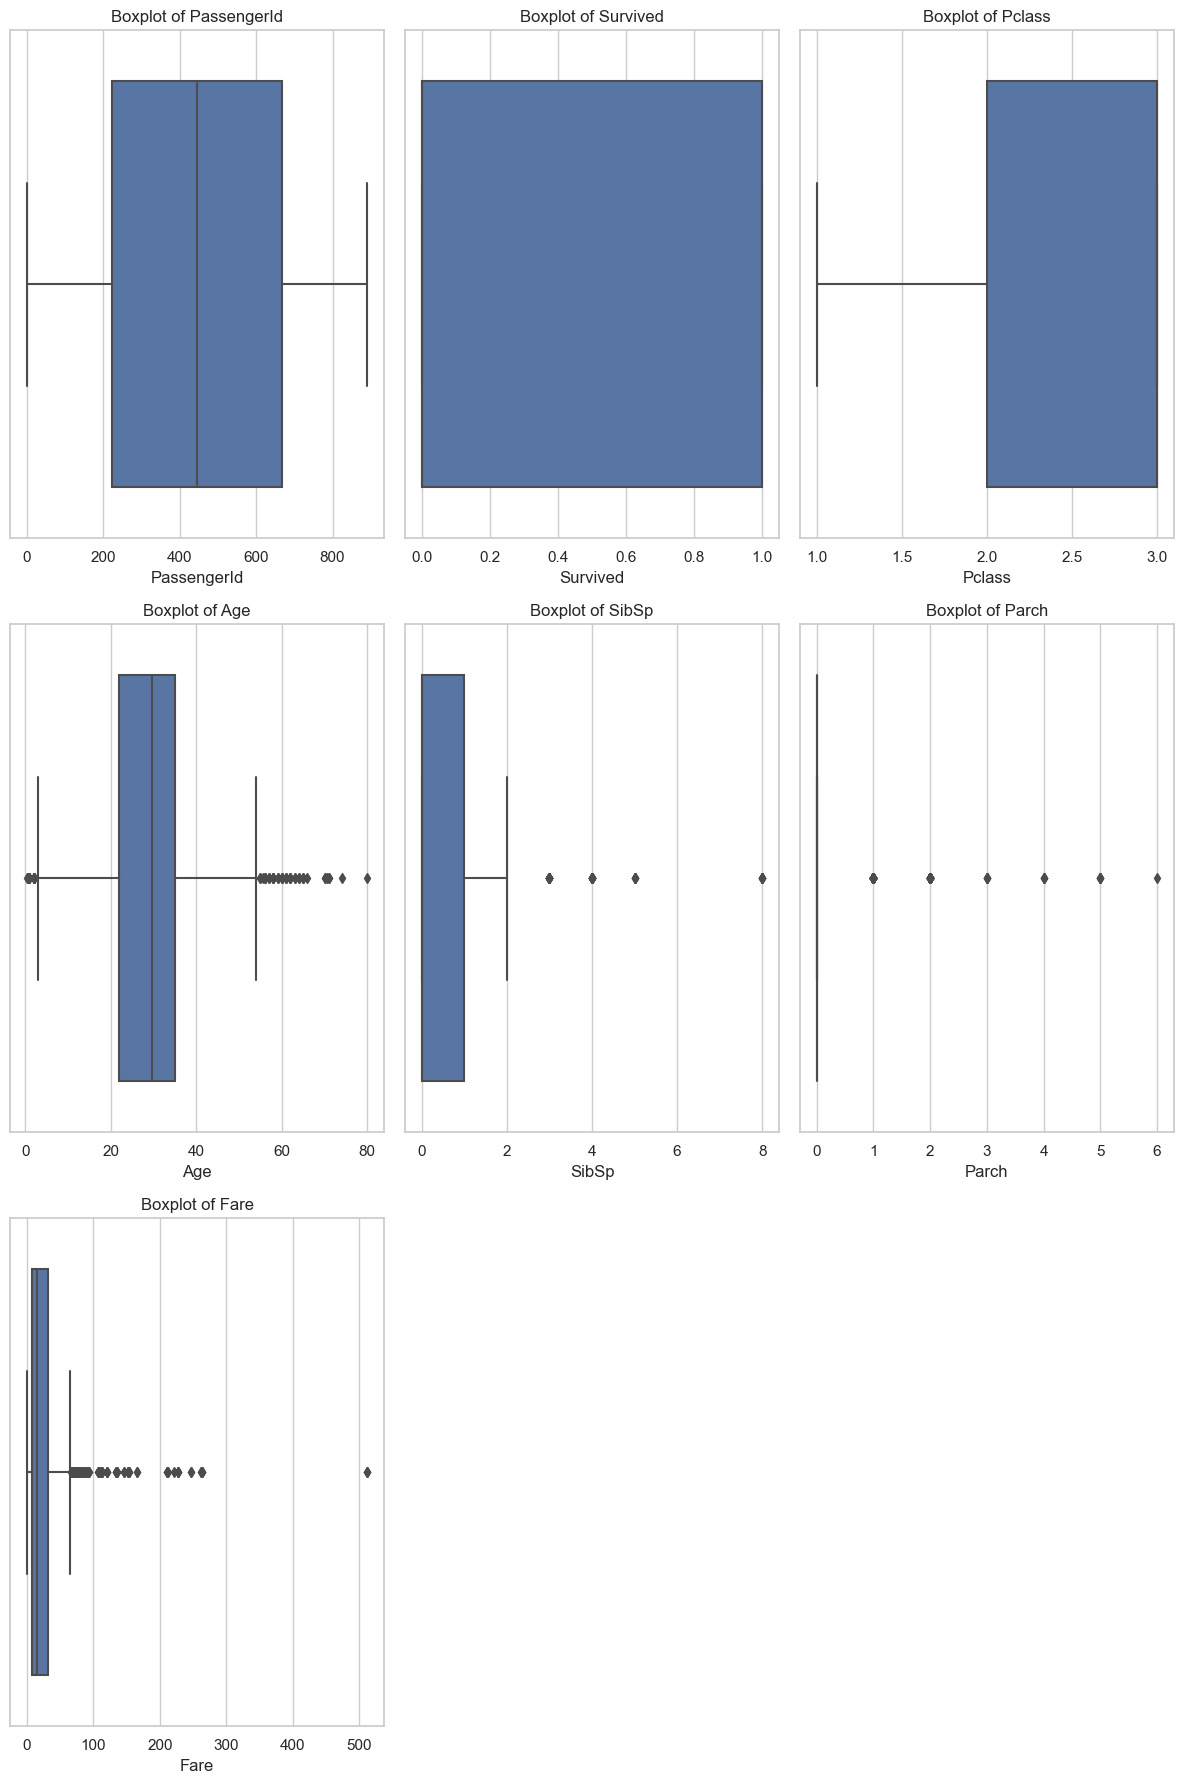

In [118]:
plt.figure(figsize=(12, 18))  
numeric_columns = df.select_dtypes(include=np.number).columns
num_rows = len(numeric_columns) // 3 + 1  # Calculate the number of rows needed
for index, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, index)  # Create subplots in a flexible grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [119]:
# Calculate Z-scores for the numeric columnsfrom scipy.stats import zscore
from scipy.stats import zscore
z_scores = np.abs(zscore(df[numeric_columns]))

In [120]:
# Set a Z-score threshold for outlier detection 
outlier_threshold = 3

In [121]:
# Identify rows with outliers in any numeric column
outliers = (z_scores > outlier_threshold).any(axis=1)

In [122]:
# Remove rows with outliers
data_no_outliers = df[~outliers]

In [123]:
# Print the shape before and after outlier removal
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", data_no_outliers.shape)

Shape before outlier removal: (891, 11)
Shape after outlier removal: (820, 11)


In [124]:
# Check skewness of numeric columns
skewness = df[numeric_columns].skew()

In [125]:
print("Skewness for numeric columns:")
print(skewness)

Skewness for numeric columns:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [126]:
# Handle skewness using log transformation
skewed_columns = skewness[abs(skewness) > 0.5].index
for column in skewed_columns:
    data_no_outliers[column] = np.log1p(data_no_outliers[column])

In [127]:
# Check skewness after transformation
skewness_after = data_no_outliers[numeric_columns].skew()

In [128]:
print("Skewness after log transformation:")
print(skewness_after)

Skewness after log transformation:
PassengerId    0.003454
Survived       0.450825
Pclass        -0.785919
Age            0.318314
SibSp          1.292829
Parch          1.832391
Fare           0.196364
dtype: float64


In [129]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_no_outliers, columns=['Sex', 'Embarked'], drop_first=True)

In [130]:
# Perform feature scaling (example using StandardScaler)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[['Age', 'Fare']])
data_encoded[['Age', 'Fare']] = data_scaled

In [131]:
print(data_encoded.head())

   PassengerId  Survived    Pclass  \
0            1         0  1.386294   
1            2         1  0.693147   
2            3         1  1.386294   
3            4         1  0.693147   
4            5         0  1.386294   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.641702  0.693147   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.675821  0.693147   
2                             Heikkinen, Miss. Laina -0.312321  0.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.428785  0.693147   
4                           Allen, Mr. William Henry  0.428785  0.000000   

   Parch            Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0    0.0         A/5 21171 -0.839435         1           0           1  
1    0.0          PC 17599  1.584199         0           0           0  
2    0.0  STON/O2. 3101282 -0.751615         0           0           1  
3    0.0            11

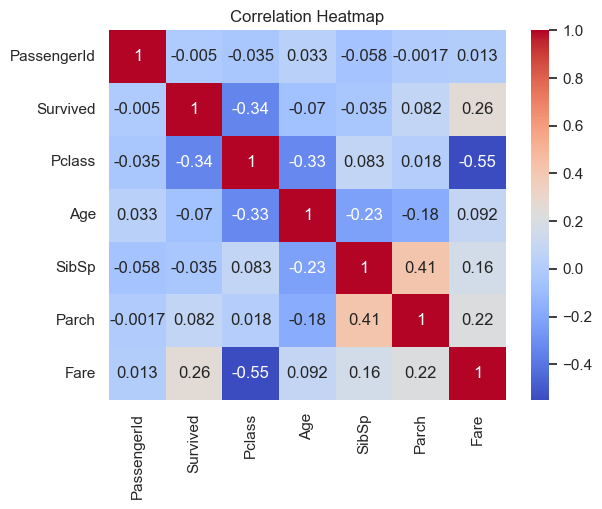

In [132]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Select numeric columns for checking multicollinearity
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [135]:
# Calculate VIF for each numeric column
X = df[numeric_columns]
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [136]:
# Print the calculated VIFs
print(vif)

       Feature       VIF
0  PassengerId  3.676625
1     Survived  1.643173
2       Pclass  4.638648
3          Age  4.363632
4        SibSp  1.566975
5        Parch  1.558459
6         Fare  1.872085


In [137]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [138]:
# Drop non-numeric and irrelevant columns
drop_columns = ['Name', 'Ticket', 'PassengerId']
df = df.drop(columns=drop_columns)

In [139]:
# Convert categorical columns using one-hot encoding
categorical_columns = ['Sex', 'Embarked']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [140]:
# Separate target variable and features
X = data_encoded.drop(['Survived'], axis=1)
y = data_encoded['Survived']

In [141]:
# Use SelectKBest to select top features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [143]:
# Train a Random Forest classifier with selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [144]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7988826815642458


In [145]:
# Separate features and target variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [146]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Print the shape of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# List of classifiers to try
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [149]:
from sklearn.compose import ColumnTransformer
#Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_columns)],remainder='passthrough')

In [150]:
# Apply the preprocessing to training and testing sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [151]:
# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_encoded, y_train)

LogisticRegression()

In [152]:
# Evaluate the model
accuracy = clf.score(X_test_encoded, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7988826815642458
